# The Safest Neighborhood

### Introduction: 

The best neighborhood is one in which the residents can feel safe and free from harm. Other amenities such as parks and good education systems are nice, but they are not very useful if the people are not alive to use them. There are many types of harm, but the three we will focus on are fires, crime, and step-related accidents. The motivation behinnd picking safety as our metric to analyze the neighborhoods is that it is a unique way to view the problem of the best neighborhood in Pittsbrgh. Further, safety impacts the personal well-being of the people living in a neighborhood, thus being an essential factor when evaluating neigborhoods. 

### Datasets:

* Fire Incidents in Pittsbrugh: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh
    * This dataset records all fire incidents in the city of Pittsburgh since 2013, recording different aspects of the fires, most importantly, the neighborhoods in which they occurred.
* Recorded Crimes in Pittburgh: https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e
    * This dataset records all incidents of crime in the city of Pittsburgh since 2005. In each entry (over 225,000) a neighood is recorded, allowing the data to be analyzed on a neighborhod basis.
* Population per Neighborhood:  https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv
    * This dataset is simply the total populations of each neighborhhod through census data, allwwoing data like crime and fires to be analyzed while adjusted for population.
* Neighborhood Map Data of Pittsburgh: http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip
    * This is the map data for the city of Pittsburgh, allowing us to analayze metrics geographically through GeoPandas.
* City of Pittsburgh Steps: https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64

---

# Fires
Fires play a large role in the number of accidents in any given city and are a crucial metric in deciding the accident safety of any neighborhood. Disparities in prevalence between neighborhoods can come down to problems complex as a faulty fire department or simple as the material the homes were built of. There are 1,318,500 fires in the U.S. a year, causing over 3,500 deaths and $25.6 billion in losses, thus making it an essential statistic. We are measuring this metric based on the number of fires in a neighborhood, with a lower number of fires being better. The dataset being used is a record of all fire incidents in the city of Pittsburgh since 2013. The analyis will analyze this data, adjusting for population. Specifically, we will analyze by neighborhood using both a bar graph and a heat map of Pittsburgh.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
import geopandas as gpd

In [3]:
fire_inc = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02",
                       index_col="call_no", parse_dates=True)
total_pop = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv",
                       index_col = "Id")
fire_inc.sample(5) #Gives a sample of the dataset

,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
call_no,,,,,,,,,,,,,,,,,
F170018822,113.0,"Cooking fire, confined to container","7200 BLOCK BEACON HILL DR, WILKINSBURG PA 15221",2017-03-06T22:12:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.441385,-79.863071
F200035912,150.0,"Outside rubbish fire, Other","4500 BLOCK PANAMA WAY, PITTSBURGH PA 15224",2020-06-07T21:35:11,0,231EN06,802.0,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-1,40.462742,-79.952145
F140031261,131.0,Passenger vehicle fire,"5100 BLOCK CHAPLAIN WAY, PITTSBURGH PA 15207",2014-05-03T01:36:01,0,231EN13,1501.0,Hazelwood,5.0,15.0,4.200356e+10,3.0,15.0,4.0,2-13,40.406599,-79.945931
F170023539,113.0,"Cooking fire, confined to container","700 BLOCK S BRADDOCK AVE, PITTSBURGH PA 15208",2017-03-23T13:33:15,1,231EN16,1410.0,NaN,NaN,NaN,4.200351e+10,NaN,NaN,NaN,2-16,40.398957,-79.834462
F190053763,113.0,"Cooking fire, confined to container","8600 BLOCK BRICELYN ST, PITTSBURGH PA 15208",2019-06-29T16:11:23,1,231EN17,1306.0,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,NaN,NaN


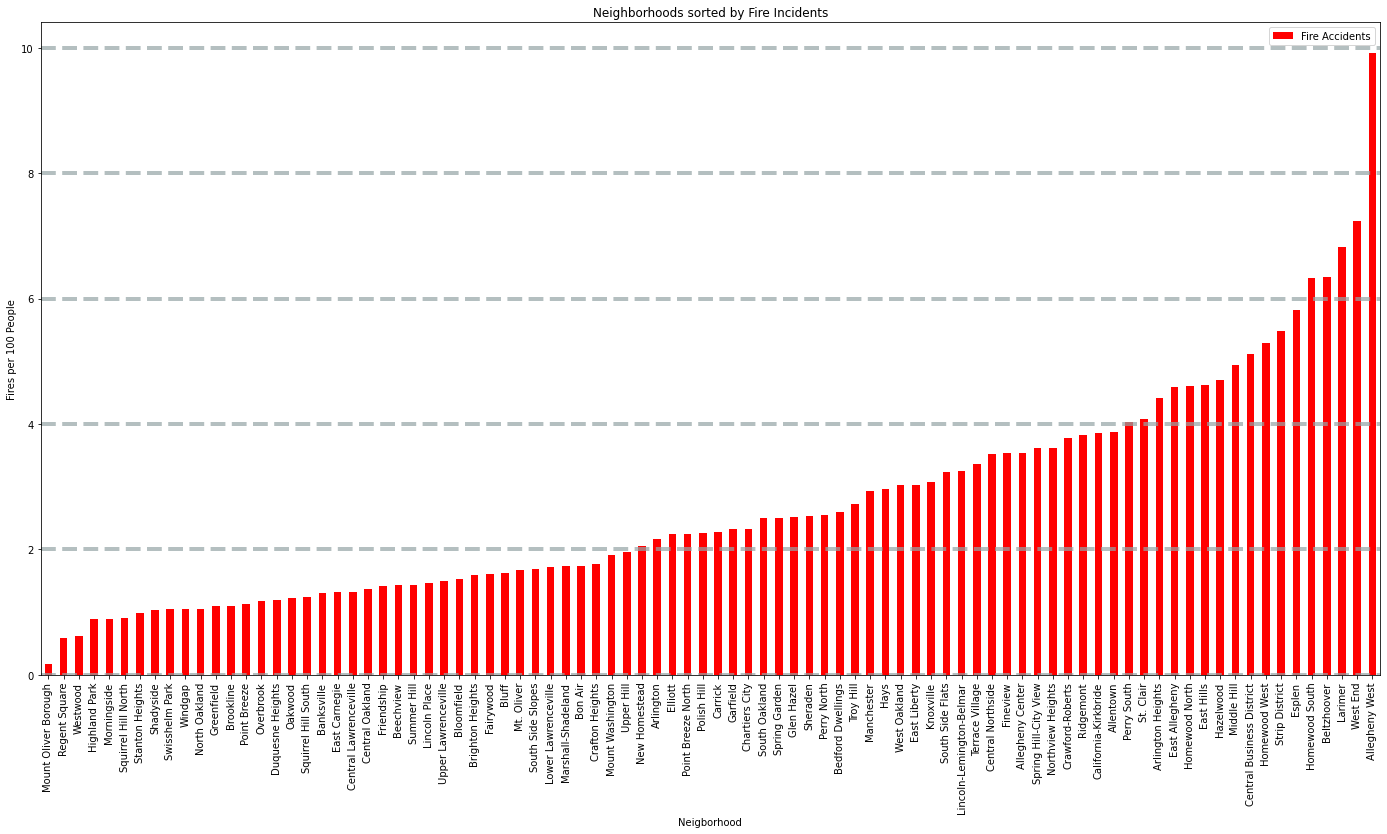

In [14]:
fires = dict() #Dictionary for the fire incidents
pops = dict()  #Dictionary for the population

for i in range(len(fire_inc)):
    if(fire_inc.iloc[i,7] in fires): #Counts the number of fire incidents for each neighborhood
        fires[fire_inc.iloc[i,7]] += 1
    else:
        fires[fire_inc.iloc[i,7]] = 1       


for i in range(len(total_pop)):
       if(total_pop.iloc[i,0] in fires): #Performs the population adjustment and year averaging if the neighborhood is in the dictionary
            fires[total_pop.iloc[i,0]] = ((float)(fires.get(total_pop.iloc[i,0]) / total_pop.iloc[i,1]) * 100)
            
sorted_fires = sorted(fires.items(), key=lambda x:x[1]) #Sorts the dictinary

keys = []
values = []

for v in sorted_fires: #Appends the keys and values of the fire dictionary into lists
    keys.append(v[0])
    values.append(v[1])

for i in range(4): #Removes the outlier data from the dictionary
    keys.pop(len(keys)-1)
    values.pop(len(values)-1)

df = pd.DataFrame(values, columns = ['Fire Accidents'], index= keys) #Processes the kists as a dataframe

#This block of code simply graphs the data as a bar graph
df.plot(kind='bar', color = 'red')
plt.title("Neighborhoods sorted by Fire Incidents")
plt.xlabel("Neigborhood")
plt.ylabel("Fires per 100 People") 
plt.rcParams["figure.figsize"] = (28,12)  #Figure size is adjusted so that the names are readable
plt.grid(color='#95a5a6', linestyle='--', linewidth=4, axis='y', alpha=0.7)  #Lines are added to make the graph more readable
plt.show()

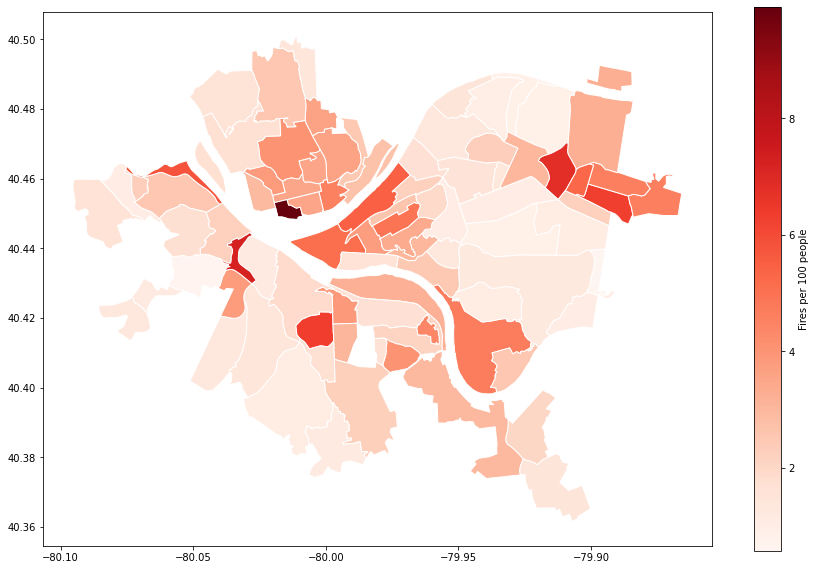

In [5]:
pitt = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")
fire_df = {'hood':keys, 'fires':values} #Makes a new data frame out of the data so that it can merged into the original dataset
fire_df = pd.DataFrame.from_dict(fire_df)
merge_fire = pitt.set_index('hood').join(fire_df.set_index('hood')) #Joins the dataseets together based on the neghborhood names
#Creates a heatmap of the data based on the color red
merge_fire.plot(column='fires', 
               cmap='Reds',              
               edgecolor="white",       
               legend=True,             
               legend_kwds={'label': "Fires per 100 people"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "white"}
               )
plt.show()

---
# Crime
Just as fires are an essential piece of neighborhood safety, crime is even more so, with homicides accounting for 18 thousand deaths a year. Further, crime is an important mettric because it often is an indicator of other aspects of the quality of neoghborhood, whether it be funding, average income, and even average education levels. Through our dataset, we will be measuring crime safety based on the number of crimes in a given neighborhood, with a lower number being better. The dataset being used is a record of all crime occurances in the city of Pittsburgh since 2005. The analyis will analyze this data, adjusting for population and getting a yearly average, by neighborhood using both a bar graph and a heat map of Pittsburgh.

In [6]:
crime_inc = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e", index_col="PK")
crime_inc.sample(5)

,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
PK,,,,,,,,,,,,,,
2972733,18015670.0,6,2018-01-25T08:00:00,"300 Block S Negley AV Pittsburgh, PA 15206",N,Friendship,5,THEFT FROM AUTO,3304 Criminal Mischief. / 3934 Theft from Vehicle,807.0,7.0,2.0,-79.932767,40.460623
2914338,17090491.0,2,2017-05-14T20:45:00,Zone 5,N,NaN,5,RAPE BY FORCE,3121 Rape.,NaN,NaN,NaN,NaN,NaN
2822201,16061275.0,99,2016-04-05T18:00:00,"Arlington AV & Eleanor ST Pittsburgh, PA 15210",N,Arlington,3,NaN,9124 Drug Investigation,1603.0,3.0,4.0,-79.972909,40.417424
3105804,19183161.0,99,2019-09-11T16:31:00,"700 Block Johnston AV Pittsburgh, PA 15207",Y,Glen Hazel,4,NaN,9129 Miscellaneous Investigation,1504.0,5.0,3.0,-79.933456,40.405805
2911808,17082464.0,99,2017-05-06T12:08:00,"Banksville RD & Wenzell AV Pittsburgh, PA 15216",Y,Beechview,6,NaN,9999 Miscellaneous Report (No Crime),1920.0,2.0,5.0,-80.034201,40.406966


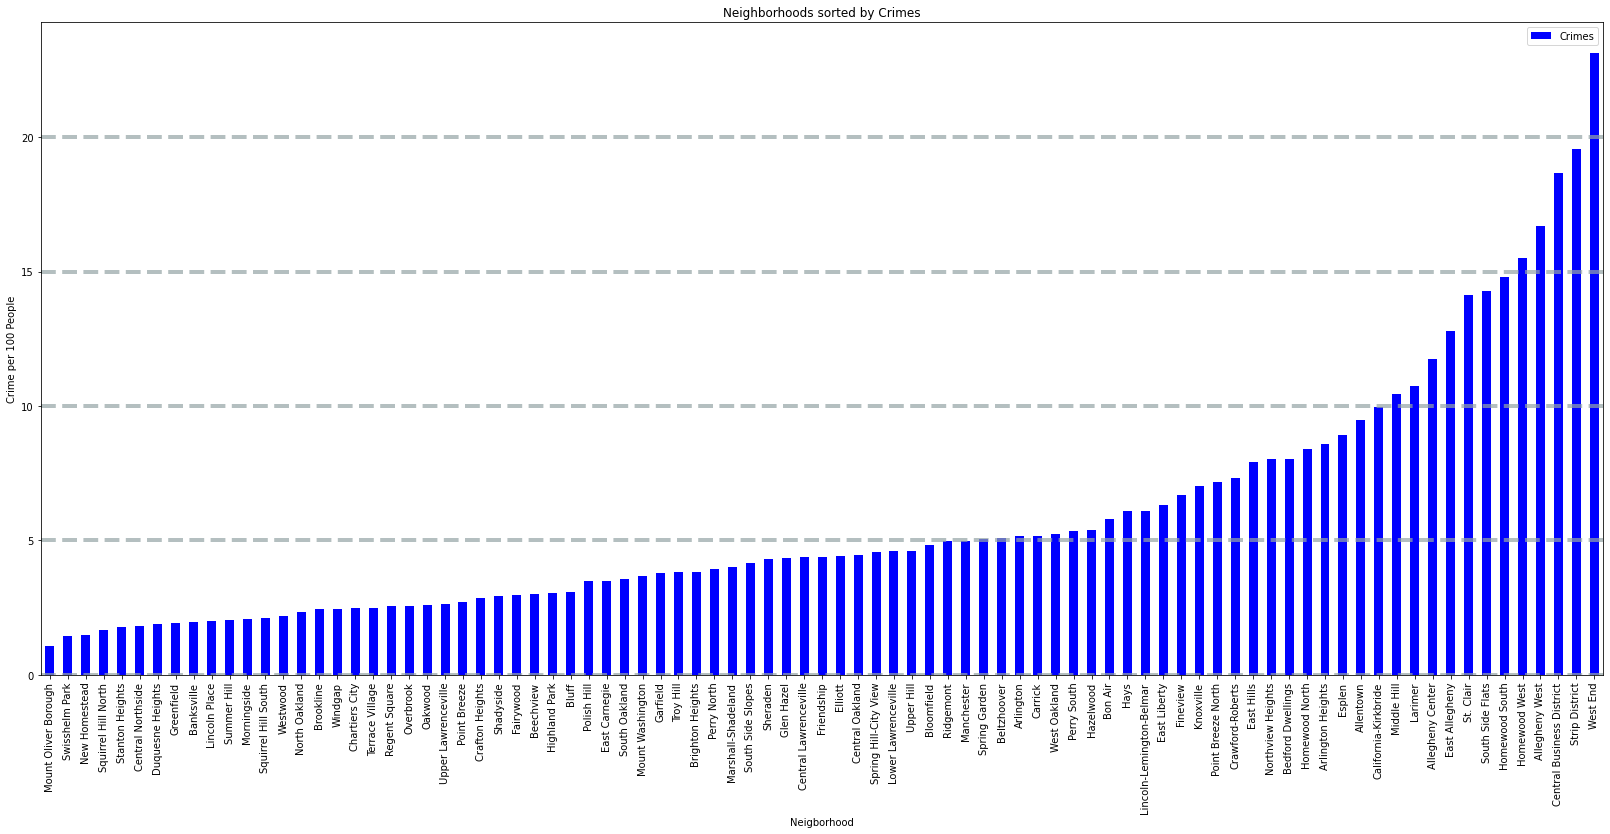

In [84]:
crime = dict() #Dictionary for crime data

for i in range(len(crime_inc)): #Creates a dictioary of how many crime incidents there are in a neighborhood
    if(crime_inc.iloc[i,5] in crime):
        crime[crime_inc.iloc[i,5]] += 1
    else:
        crime[crime_inc.iloc[i,5]] = 1    
 
crime["Mount Oliver Borough"] = (363 + 117 + 70) #This had to be manually coded in because it had three different names in the dataset         
 
for i in range(len(total_pop)):
       if(total_pop.iloc[i,0] in crime): #Adjusts for population and year
            crime[total_pop.iloc[i,0]] = ((float)(crime.get(total_pop.iloc[i,0]) / total_pop.iloc[i,1]) * 100)/15
            

sorted_crime = sorted(crime.items(), key=lambda x:x[1]) #Sorts the dictionary

keys = []
values = []
for v in sorted_crime: #Makes a list of the neighborhood names and crime occurances so that they can be made into a dataframe
    keys.append(v[0])
    values.append(v[1])

#This dataset was faulty and had less consistent data    
for i in range(13): #Removes the outliers
    keys.pop(len(keys)-1)
    values.pop(len(values)-1)

#Makes a bar graph in a similar fashion to the fire graph
df = pd.DataFrame(values, columns = ['Crimes'], index= keys) 
df.plot(kind='bar', color = 'blue')
plt.title("Neighborhoods sorted by Crimes")
plt.xlabel("Neigborhood")
plt.ylabel("Crime per 100 People")
plt.rcParams["figure.figsize"] = (28,12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=4, axis='y', alpha=0.7)
plt.show()

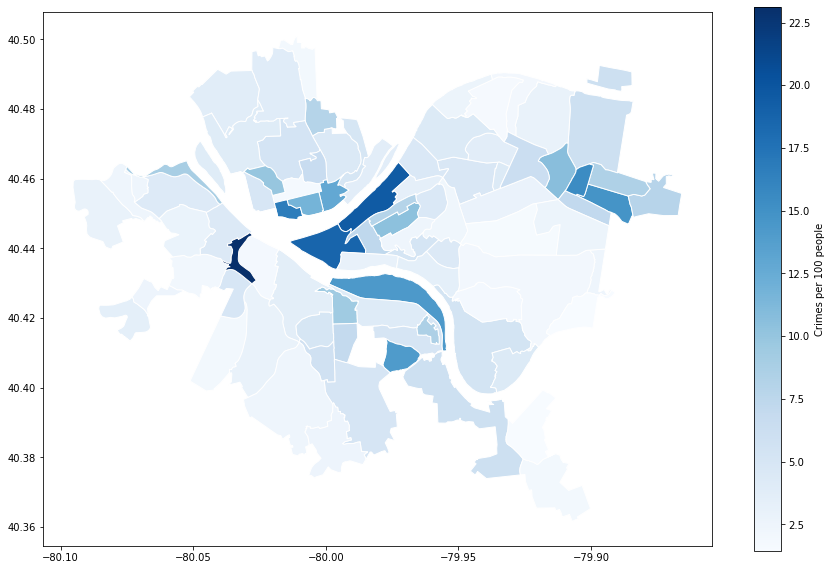

In [8]:
pitt = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")
#Creates a heat map of Pittsburgh based on crime data
crime_df = {'hood':keys, 'crime':values} #Data frame of our results of the dataset
crime_df = pd.DataFrame.from_dict(crime_df)
merge_crime = pitt.set_index('hood').join(crime_df.set_index('hood')) #Joins the origianl and new dataset
merge_crime.plot(column='crime', 
               cmap='Blues',              
               edgecolor="white",       
               legend=True,             
               legend_kwds={'label': "Crimes per 100 people"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "white"}
               )
plt.show()

## Analysis
The results of the crime incidents show similar trends to that of the fire data, with many of the neighborhoods ranking high. Notably, Mount Oliver Borough, Squirrel Hill and Swissvale rank highly again, putting them in contention for the safest neighborhoods in Pittsburgh. The geographic trends are dually constent as the center of the city tend to produce higher crime even when adjusted for population. Also, again, the busnisess districts in Pittsburgh like the Strip District performed poorly due to the high volume of people and busniess occurring in its confines. Therefore, again, if you are picking a neighborhood solely on your safety, it is best to pick a home in the more residentially designated areas. As of now, Mount Oliver Borough has been the safest Pittsburgh area, claiming both the lowest crime and fire rate in the city.

---
# Steps
Every day, step-related injuries occur, both within homes and outside. Steps can be difficult to navigate in some circumstances, and the consequences of falling can be deadly. In the US, studies estimate over 1,000,000 injuries and 12,000 deaths are caused by steps each year. Pittsburgh is a city with many steps; they were commonly used for commuting and getting around the city, but now, many have been weathered down and are unsafe. This dataset contains information about the distribution of steps across the city. Neighborhoods with more steps pose a greater risk for accidents, especially in the winter. For this dataset, the neighborhoods will be judged based on their step count (lower is better).

In [71]:
stepCSV = pd.read_csv("https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64", index_col="id", parse_dates=True)

 
#get rid of empty data
def filterEmpty(x):
    return x.iloc[0,5] != None
stepData = stepCSV.groupby("number_of_steps").filter(filterEmpty)

stepCount = {}

#loop through data, adding step count for each entry to corresponding neighborhood
for i in range(len(stepData)):
    
    #check if key exists in dict
    if stepData.iloc[i,14] in stepCount:
        stepCount[stepData.iloc[i,14]] += stepData.iloc[i,5]
    else:
        stepCount[stepData.iloc[i,14]] = stepData.iloc[i,5]

#sorting the data
def stepSort(x):
    return x[1]

stepList = [[key, value] for key, value in stepCount.items()] #can't sort a dictionary
stepSorted = sorted(stepList, key=stepSort)

stepCSV.sample(5)

,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,transit_rider_count,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,
2138829449,Hoosac St from Alger St to Neeb St East,3rd Division,NaN,Concrete,310.0,51.0,NaN,NaN,NaN,NaN,...,Greenfield,5.0,15,42003151600,3,15,4,2-12,40.427127,-79.941279
1452476703,Mifflin Rd at Mifflin Rd Terrace to Cox Place,3rd Division,1960-01-01,Concrete,262.0,65.0,1.0,7.0,227.0,73.0,...,Lincoln Place,5.0,31,42003310200,3,31,4,4-20,40.370850,-79.915395
358530708,Clover St from Wellington Way to Cobden St,4th Division,NaN,Wood,120.0,42.0,1.0,8.0,1004.0,36.0,...,South Side Slopes,3.0,16,42003160800,3,16,3,4-22,40.420194,-79.970887
1068718145,Eureka St from Pasadena St to Aleppo Way,4th Division,NaN,Concrete,18.0,8.0,0.0,100.0,1545.0,89.0,...,Mount Washington,3.0,18,42003180700,5,18,3,4-5,40.423765,-80.001521
544733252,Mission St from Barry St to Oakley Way,4th Division,1950-01-01,Concrete,287.0,86.0,0.0,100.0,1012.0,45.0,...,South Side Slopes,3.0,16,42003160800,3,16,3,4-22,40.422402,-79.969867


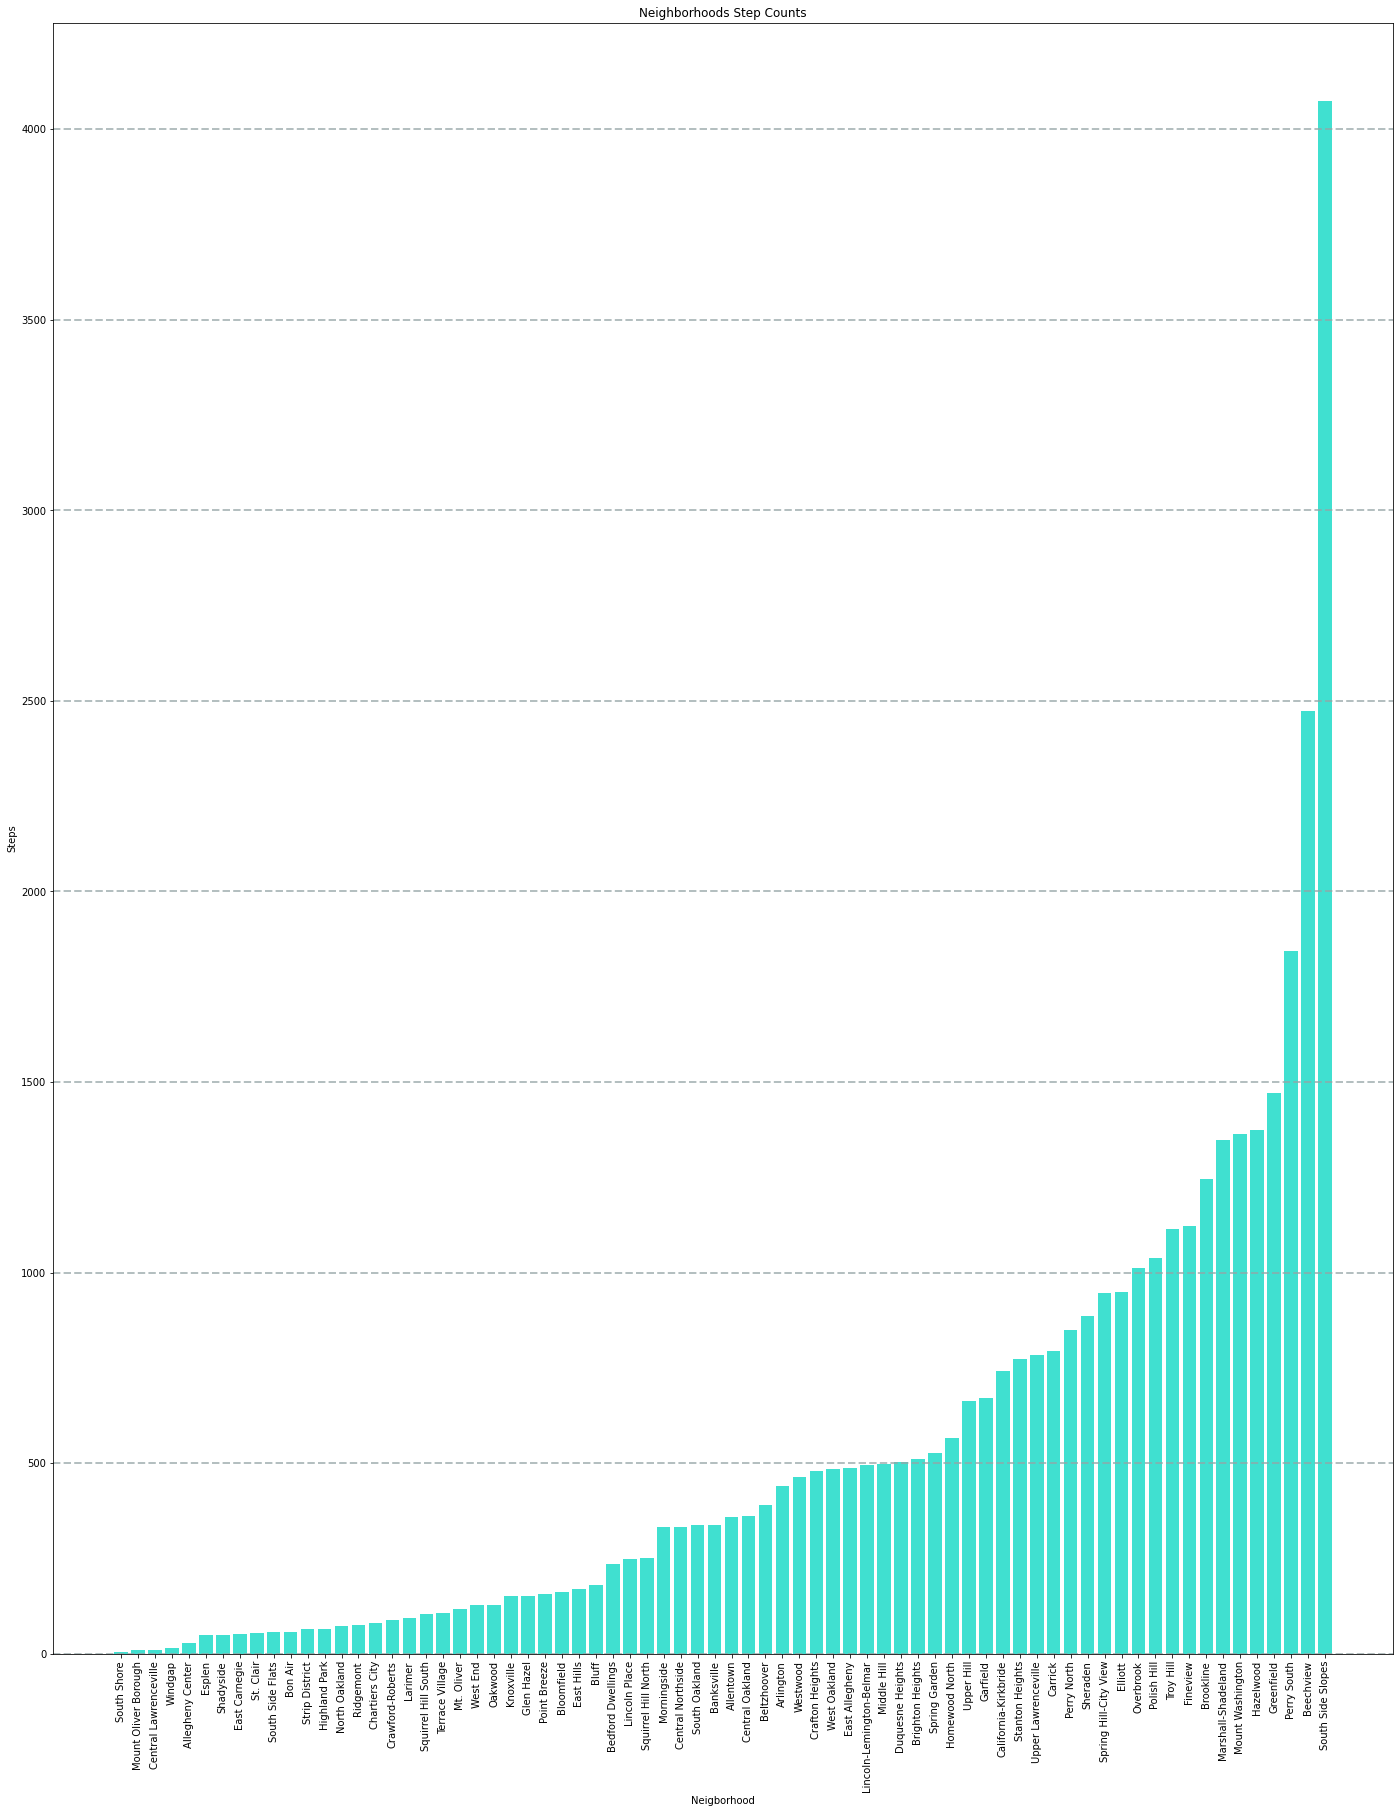

In [55]:
plt.bar(*zip(*stepSorted), color="turquoise")   #uses zip and * to pass the lists from the dict to the plot
plt.title("Neighborhoods Step Counts")
plt.xlabel("Neigborhood")
plt.ylabel("Steps")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

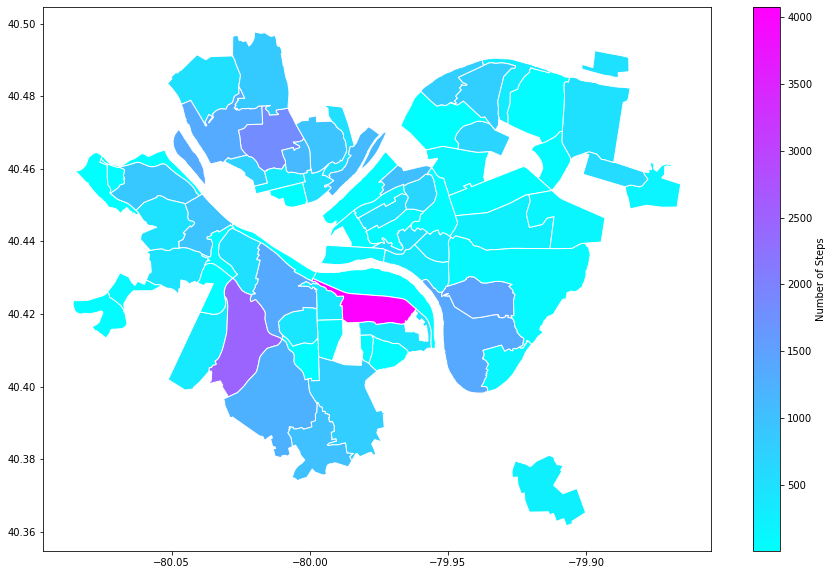

In [62]:
neighborhoods = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")

#convert dictionary to dataframe
stepDF = pd.DataFrame.from_dict(stepCount, orient='index', columns=['steps'])

#merge neighborhood dataset with steps
stepsMap = neighborhoods.merge(stepDF, how='right', left_on='hood', right_index=True)

stepsMap.plot(column='steps', # set the data to be used for coloring
               cmap='cool',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               )
plt.show()

---
# Best Neighborhood
To detemine the best neighborhood we will combine all three of our metrics into the same dataset. The fires dataset is already wheighted, having values ranging from 1-10.  Therefore, the step data was scaled so that it would roughly have the same range of values. However, we gave the crime metric twice the wieghting, with values between 0-20, since we believe that it is the most important metric when viewing neighborhood safety. The combination of all three metrics is represented on a bar graph and we will draw our conclusion based on the visual representation of the metrics.

In [72]:
firstMerge = crime_df.merge(fire_df, on="hood") #Merges the two dataframes by the nieghborhoods

#scale step data down to a comparable scale to other metrics
for i in range(len(stepSorted)):
    stepSorted[i][1] /=  400 #Dividing by 400 puts the step values into a range of 1-10

scaledStepDF = pd.DataFrame(stepSorted, columns=['hood','steps'])

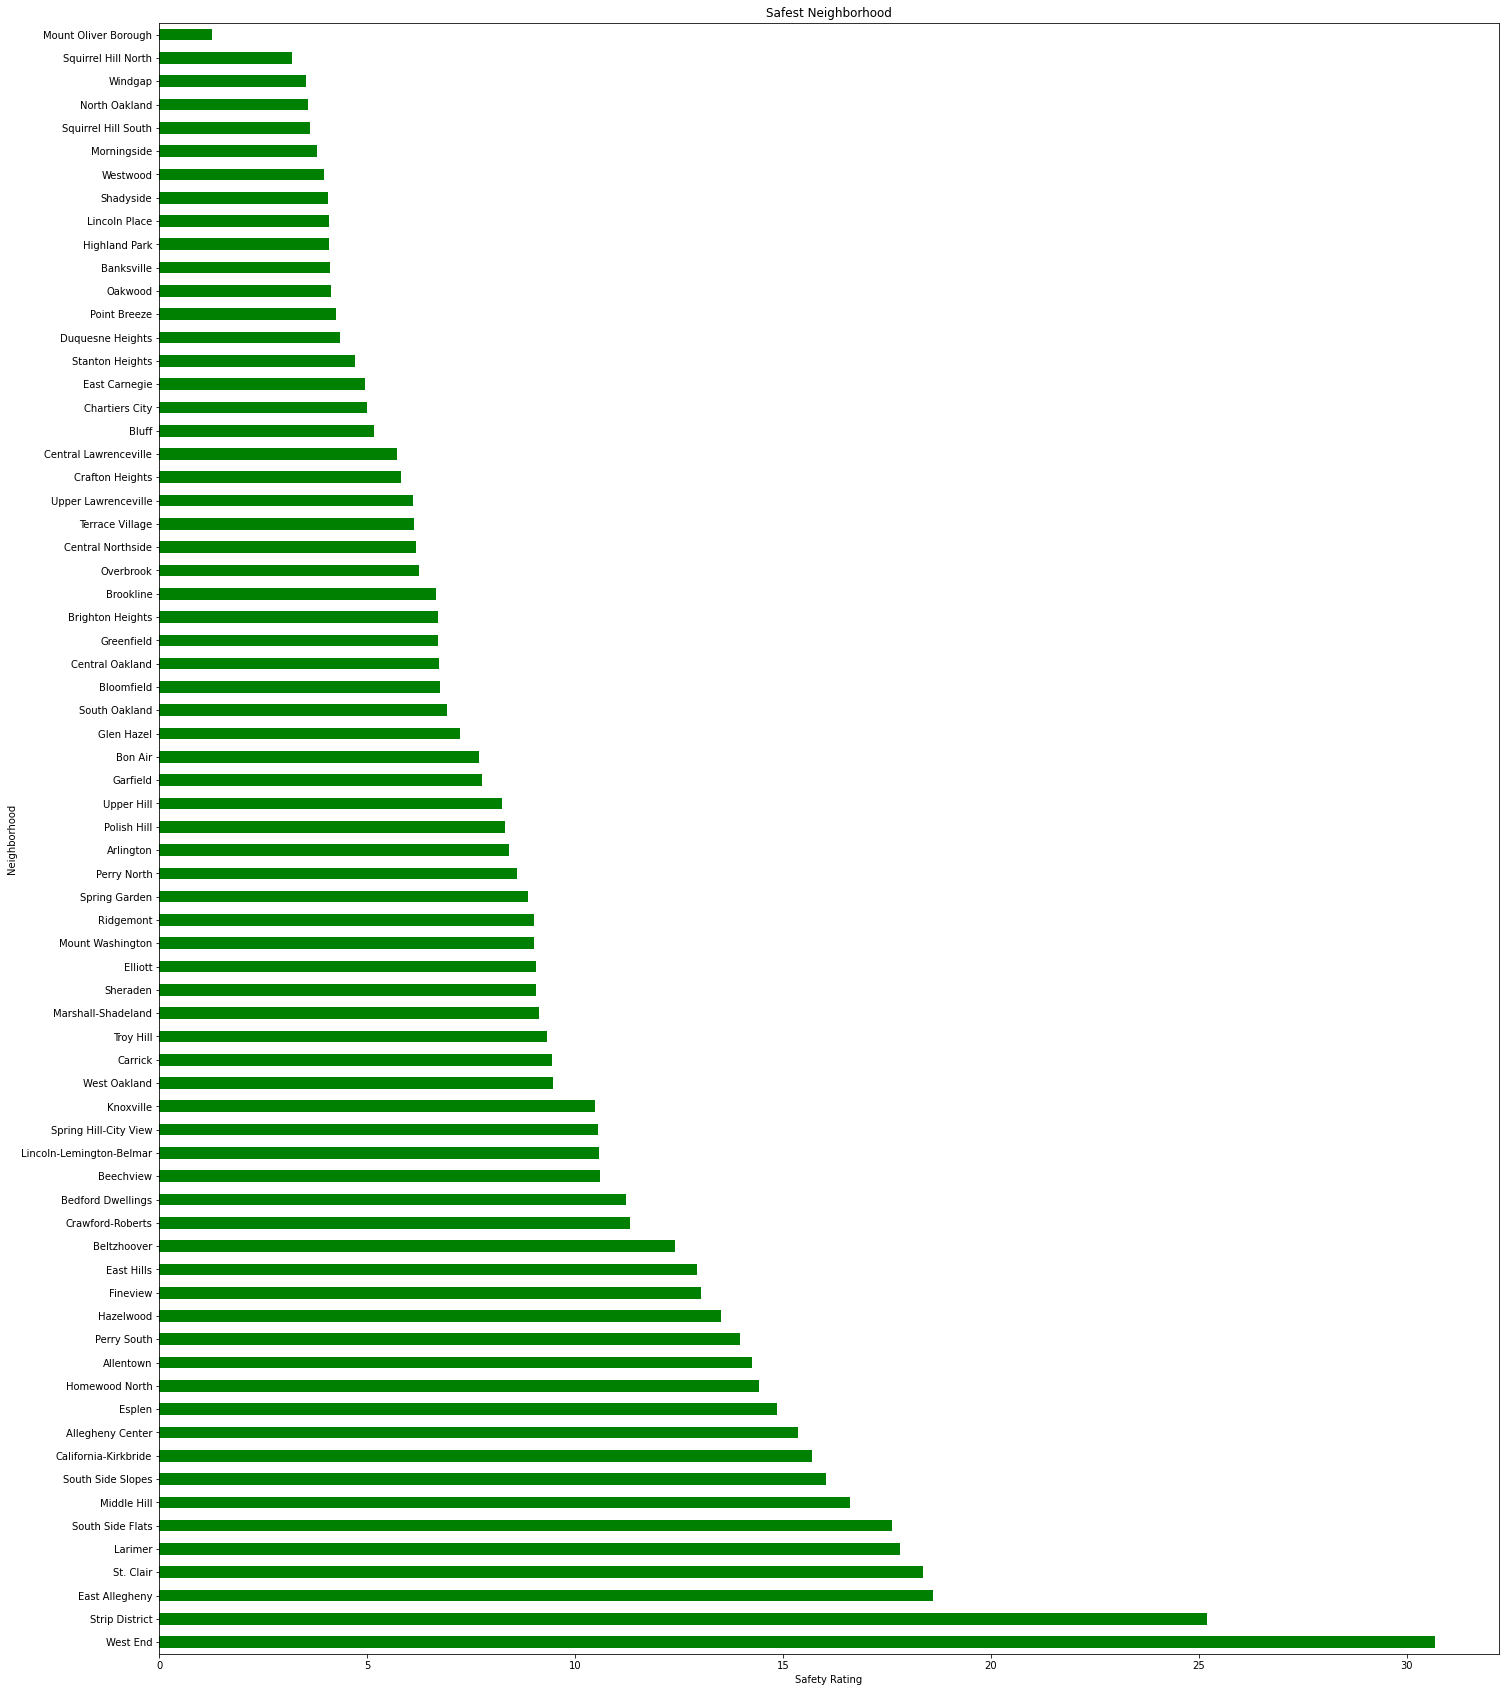

In [78]:
merged = firstMerge.merge(scaledStepDF, on="hood").set_index("hood") #merges all three dataframes
merged["total"] = merged["fires"] + merged["crime"] + merged["steps"] #creates a total column to analyze the overall metric
merged_sort = merged.sort_values('total', ascending=False) #Sorts the values in the data frame by the total column

#This block of code visualizes the data using a bar graph
merged_sort['total'].plot.barh(color = 'green', stacked=True)
plt.title("Safest Neighborhood")
plt.xlabel("Safety Rating")
plt.ylabel("Neighborhood")
plt.rcParams["figure.figsize"] = (24,30)
plt.show()

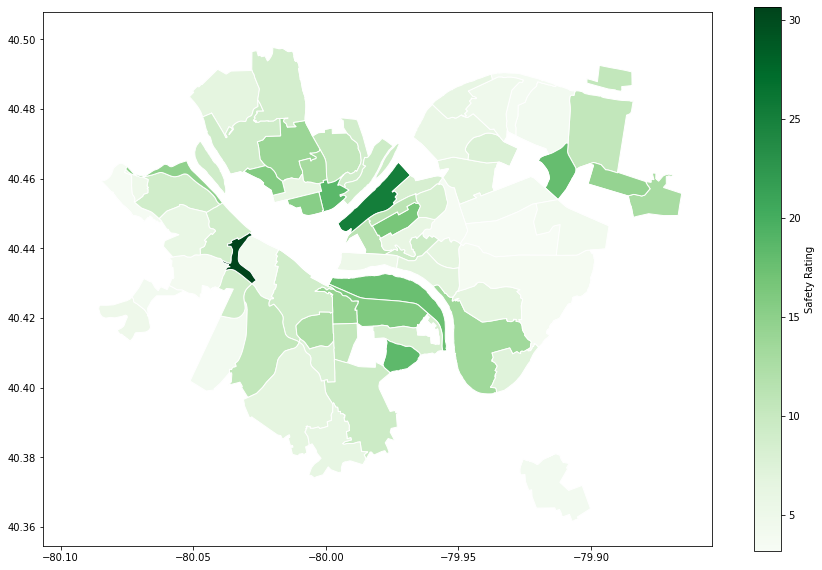

In [80]:
merge_total = pitt.set_index('hood').join(merged) #Joins the dataseets together based on the neghborhood names
#Creates a heatmap of the data based on the color red
merge_total.plot(column='total', 
               cmap='Greens',              
               edgecolor="white",       
               legend=True,             
               legend_kwds={'label': "Safety Rating"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "white"}
               )
plt.show()

## Analysis
Based on the combination of the three metrics, Mount Oliver Borough was the safest and therefore, best neighborhood in Pittsburgh. This is a little decisive because Mount Oliver Borough is not technically part of the City of Pittsburgh as it is its own city and opposed annexation by the city despite being surrounded by its neighborhoods. However it is hard not to include them based on their performance and their inclusion in many of the datasets. The results of our analysis was personally suprising to me because my intepretation of Mount Oliver Borough is not that of a safe neighborhood. However, the other high-ranking neighborhoods like Squirrel Hill were entirely expected. This could have been result of faults in the datasets since Mount Oliver Borough is not technically under the jurisdiction of Pittsburgh, maintaing itself as its own ciy. Therefore, since it is independednt, they may handle much of their crime and fire incidents internally and that would not be reported in the WRPDC datasets. If you do not consider it part of Pittsburgh, Squirrel Hill North is the safest neighborhood. Further, by merging with the steps dataset, it put many neighborhhods out of contention because they did not report any data and we bellieve that if a neighborhood does not report their dangerous steps, they should not be considered for the title of the best neighborhood. Also, the geographic trends of safety are consistent with the crime and fire metrics, but resendential areas have now been considered less safe with the inclusion of steps.

---
### James Duty's Conclusion:
The data-driven determination of the best neighborhood is much different than my personal favorite neighborhood in Pittsburgh, which is the Strip District. Further, I do not think that the best neighborhood to live in should be your favorite neighborhood. I belive the best neighborhood to live in is the neighborhood that where you feel the safest and where you can unwind. However, that should not be your favorite neighborhood, with your favorite neighborhood being the place you like explore and have new experiences. For example, I would never want to live in the Strip District, it is too loud and has too many people bustling around the different businesses, but I enjoy spending time there for the same reasons, it offers the experience of a large city in a small one. Also, the Strip District performed poorly in our safety metrics and I completely expected it too, but it still is my favorite neighborhood. Despite the data-driven deteermination not calculating my favorite neighborhood, I believe that it calculates the best neighborhood to live in.